<a href="https://colab.research.google.com/github/LidiMG/Machine_Learning/blob/main/Parkinson_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/Machine_Learning/Parkinsson_Disease.csv')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


## Attribute Information:

name - ASCII subject name and recording number

MDVP:Fo(Hz) - Average vocal fundamental frequency

MDVP:Fhi(Hz) - Maximum vocal fundamental frequency

MDVP:Flo(Hz) - Minimum vocal fundamental frequency

MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several
measures of variation in fundamental frequency

MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude

NHR,HNR - Two measures of ratio of noise to tonal components in the voice

status - Health status of the subject (one) - Parkinson's, (zero) - healthy

RPDE,D2 - Two nonlinear dynamical complexity measures

DFA - Signal fractal scaling exponent

spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

In [ ]:
df.shape

(195, 24)

In [ ]:
df_P = df.copy()

In [ ]:
df_P.shape

(195, 24)

In [ ]:
df_P.drop(columns=['name'], inplace=True)
df_P.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    int64  
 1

In [ ]:
df_P.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


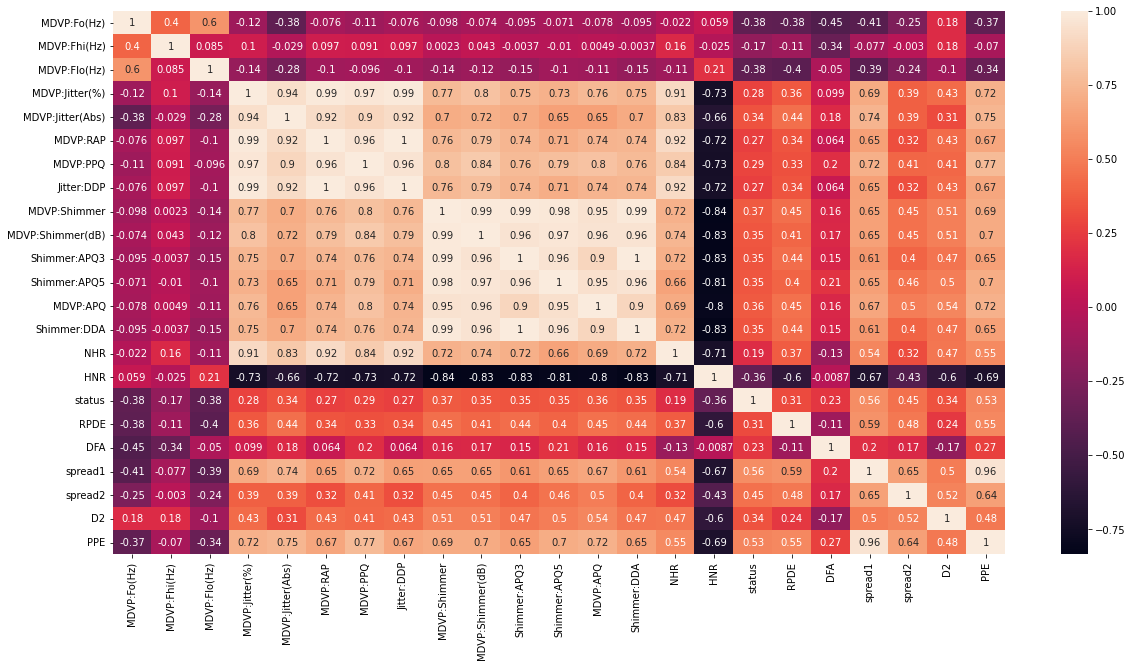

In [ ]:
#correlações
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
sns.heatmap(df_P.corr(), annot=True)
plt.show()

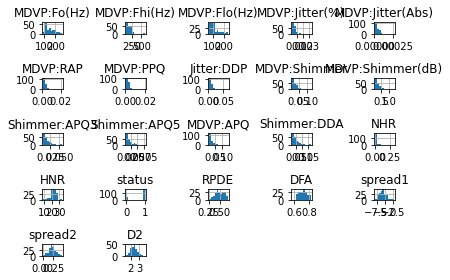

In [ ]:
#histograma [todos de valores numéricos] Dtype='float64' (ou não 'int64) 0:15, 17:22
data = df_P.iloc[:, 0:22]

data.hist()
plt.tight_layout()

In [ ]:
df_P.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [ ]:
#Outliers [Procurar explicação]
# O problema está aqui

num_var = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE']

for i in num_var:
    Q1 = df_P[i].quantile(0.25)
    Q3 = df_P[i].quantile(0.75)
    IQR = Q3 - Q1
    df_P[i] = np.where(df_P[i]>(Q3+1.5*IQR),(Q3+1.5*IQR),df_P[i]) # possíveis outliers
    df_P[i] = np.where(df_P[i]<(Q1-1.5*IQR),(Q1-1.5*IQR),df_P[i]) # possíveis outliers
    #df_P[i] = np.where(df_P[i]>(Q3+3*IQR),(Q3+3*IQR),df_P[i]) # prováveis outliers
    #df_P[i] = np.where(df_P[i]<(Q1-3*IQR),(Q1-3*IQR),df_P[i]) # prováveis outliers

# Regressão Logística

In [ ]:
from sklearn.model_selection import train_test_split

X = df_P.drop('status', axis=1)
y = df_P['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [ ]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


In [ ]:
print('Tamanho de X_train: ', X_train.shape, '\n')
print('Tamanho de X_test: ', X_test.shape, '\n')
print('Tamanho de y_train: ', y_train.shape, '\n')
print('Tamanho de y_test: ', y_test.shape, '\n')

Tamanho de X_train:  (146, 22) 

Tamanho de X_test:  (49, 22) 

Tamanho de y_train:  (146,) 

Tamanho de y_test:  (49,) 



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(n_jobs=-1, random_state=123)

In [ ]:
clf.fit(X_train, y_train)

LogisticRegression(n_jobs=-1, random_state=123)

In [ ]:
from sklearn.metrics import accuracy_score

y_train_true = y_train
y_train_pred = clf.predict(X_train)
y_test_true = y_test
y_test_pred = clf.predict(X_test)


print(f"Acurácia de Treino: {round(accuracy_score(y_train_true, y_train_pred), 4)}")
print(f"Acurácia de Teste: {round(accuracy_score(y_test_true, y_test_pred), 4)}")

Acurácia de Treino: 0.863
Acurácia de Teste: 0.8571


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test_true, y_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.57      0.70        14
           1       0.85      0.97      0.91        35

    accuracy                           0.86        49
   macro avg       0.87      0.77      0.80        49
weighted avg       0.86      0.86      0.85        49



# SVC

In [ ]:
from sklearn.model_selection import train_test_split

X = df_P.drop('status', axis=1)
y = df_P['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [ ]:
print('Tamanho de X_train: ', X_train.shape, '\n')
print('Tamanho de X_test: ', X_test.shape, '\n')
print('Tamanho de y_train: ', y_train.shape, '\n')
print('Tamanho de y_test: ', y_test.shape, '\n')

Tamanho de X_train:  (146, 22) 

Tamanho de X_test:  (49, 22) 

Tamanho de y_train:  (146,) 

Tamanho de y_test:  (49,) 



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
  for C in range(10):
    C += 1
    clf = SVC(kernel=kernel, C=C, random_state=123)
    clf.fit(X_train, y_train)
    
    
    y_pred_train = clf.predict(X_train)
    acc_train = round(accuracy_score(y_train, y_pred_train), 3)

    print(str(C) + ' - ' + kernel + f" - Acurácia no Treinamento: {acc_train}")
        
    y_pred_test = clf.predict(X_test)
    acc_test = round(accuracy_score(y_test, y_pred_test), 3)

    print(str(C) + ' - ' + kernel + f" - Acurácia no Teste: {acc_test}")

1 - linear - Acurácia no Treinamento: 0.904
1 - linear - Acurácia no Teste: 0.857
2 - linear - Acurácia no Treinamento: 0.911
2 - linear - Acurácia no Teste: 0.898
3 - linear - Acurácia no Treinamento: 0.911
3 - linear - Acurácia no Teste: 0.898
4 - linear - Acurácia no Treinamento: 0.918
4 - linear - Acurácia no Teste: 0.898
5 - linear - Acurácia no Treinamento: 0.918
5 - linear - Acurácia no Teste: 0.898
6 - linear - Acurácia no Treinamento: 0.918
6 - linear - Acurácia no Teste: 0.898
7 - linear - Acurácia no Treinamento: 0.918
7 - linear - Acurácia no Teste: 0.898
8 - linear - Acurácia no Treinamento: 0.918
8 - linear - Acurácia no Teste: 0.898
9 - linear - Acurácia no Treinamento: 0.918
9 - linear - Acurácia no Teste: 0.898
10 - linear - Acurácia no Treinamento: 0.918
10 - linear - Acurácia no Teste: 0.898
1 - poly - Acurácia no Treinamento: 0.884
1 - poly - Acurácia no Teste: 0.857
2 - poly - Acurácia no Treinamento: 0.884
2 - poly - Acurácia no Teste: 0.878
3 - poly - Acurácia no

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test_true, y_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.57      0.70        14
           1       0.85      0.97      0.91        35

    accuracy                           0.86        49
   macro avg       0.87      0.77      0.80        49
weighted avg       0.86      0.86      0.85        49



# Árvore de Decisão

In [ ]:
from sklearn.model_selection import train_test_split

X = df_P.drop('status', axis=1)
y = df_P['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [ ]:
print('Tamanho de X_train: ', X_train.shape, '\n')
print('Tamanho de X_test: ', X_test.shape, '\n')
print('Tamanho de y_train: ', y_train.shape, '\n')
print('Tamanho de y_test: ', y_test.shape, '\n')

Tamanho de X_train:  (146, 22) 

Tamanho de X_test:  (49, 22) 

Tamanho de y_train:  (146,) 

Tamanho de y_test:  (49,) 



In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=4, min_samples_split=20, random_state=123)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=20, random_state=123)

In [ ]:
from sklearn.metrics import accuracy_score

y_train_true = y_train
y_train_pred = clf.predict(X_train)
y_test_true = y_test
y_test_pred = clf.predict(X_test)

print(f"Acurácia de Treino: {round(accuracy_score(y_train_true, y_train_pred), 4)}")
print(f"Acurácia de Teste: {round(accuracy_score(y_test_true, y_test_pred), 4)}")

Acurácia de Treino: 0.9247
Acurácia de Teste: 0.8571


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test_true, y_test_pred))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74        14
           1       0.89      0.91      0.90        35

    accuracy                           0.86        49
   macro avg       0.83      0.81      0.82        49
weighted avg       0.85      0.86      0.86        49



# Florestas Aleatórias

In [ ]:
from sklearn.model_selection import train_test_split

X = df_P.drop('status', axis=1)
y = df_P['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [ ]:
print('Tamanho de X_train: ', X_train.shape, '\n')
print('Tamanho de X_test: ', X_test.shape, '\n')
print('Tamanho de y_train: ', y_train.shape, '\n')
print('Tamanho de y_test: ', y_test.shape, '\n')

Tamanho de X_train:  (146, 22) 

Tamanho de X_test:  (49, 22) 

Tamanho de y_train:  (146,) 

Tamanho de y_test:  (49,) 



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

lista = list(range(30,170,10))

for i in lista:
  clf = RandomForestClassifier(n_estimators=i,
                             max_depth=3,
                             random_state=123,
                             n_jobs=-1)
  
  clf.fit(X_train, y_train)
  y_train_true = y_train
  y_train_pred = clf.predict(X_train)
  y_test_true = y_test
  y_test_pred = clf.predict(X_test)

  print(f"Acurácia de Treino: {round(accuracy_score(y_train_true, y_train_pred), 2)}")
  print(f"Acurácia de Teste: {round(accuracy_score(y_test_true, y_test_pred), 2)}")

Acurácia de Treino: 0.92
Acurácia de Teste: 0.88
Acurácia de Treino: 0.92
Acurácia de Teste: 0.88
Acurácia de Treino: 0.92
Acurácia de Teste: 0.88
Acurácia de Treino: 0.92
Acurácia de Teste: 0.88
Acurácia de Treino: 0.92
Acurácia de Teste: 0.88
Acurácia de Treino: 0.92
Acurácia de Teste: 0.88
Acurácia de Treino: 0.92
Acurácia de Teste: 0.9
Acurácia de Treino: 0.92
Acurácia de Teste: 0.9
Acurácia de Treino: 0.92
Acurácia de Teste: 0.9
Acurácia de Treino: 0.92
Acurácia de Teste: 0.9
Acurácia de Treino: 0.92
Acurácia de Teste: 0.9
Acurácia de Treino: 0.92
Acurácia de Teste: 0.9
Acurácia de Treino: 0.92
Acurácia de Teste: 0.88
Acurácia de Treino: 0.92
Acurácia de Teste: 0.88


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test_true, y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.64      0.75        14
           1       0.87      0.97      0.92        35

    accuracy                           0.88        49
   macro avg       0.89      0.81      0.83        49
weighted avg       0.88      0.88      0.87        49

